# End of Life Principal Component Analysis (PCA) and Hierarchical Clustering

In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
from sklearn.metrics import (r2_score, mean_squared_error, mean_squared_log_error, mean_absolute_error)
from sklearn.preprocessing import PowerTransformer
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans, AgglomerativeClustering
from IPython.display import display

# Import end_of_life dataframe
end_of_life=pd.read_csv('end_of_life.csv')

In [2]:
end_of_life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   account_name                2200 non-null   object 
 1   account_id                  2200 non-null   int64  
 2   Year                        2200 non-null   int64  
 3   incorporated_country        2200 non-null   object 
 4   Primary activity            2200 non-null   object 
 5   Primary sector              2200 non-null   object 
 6   Market_Cap_USD              1956 non-null   float64
 7   Third_party_verification    2199 non-null   object 
 8   Revenue_USD                 1957 non-null   float64
 9   ebitda_USD                  1957 non-null   float64
 10  grossProfit_USD             1957 non-null   float64
 11  netIncome_USD               1957 non-null   float64
 12  cashAndCashEquivalents_USD  1957 non-null   float64
 13  shortTermInvestments_USD    1957 

In [3]:
end_of_life.head()

,account_name,account_id,Year,incorporated_country,Primary activity,Primary sector,Market_Cap_USD,Third_party_verification,Revenue_USD,ebitda_USD,...,longTermInvestments_USD,totalAssets_USD,totalLiabilities_USD,totalInvestments_USD,totalDebt_USD,totalEquity_USD,Scope_3_emissions_type,Scope_3_emissions_amount,scope_1_2_emissions_amount,Year_sq
0,Aptiv,4407,2018,United Kingdom,Electrical equipment,Electrical & electronic equipment,1.595156e+10,No third-party verification or assurance,1.443500e+10,2.260000e+09,...,9.900000e+07,1.248000e+10,8.810000e+09,1.710000e+08,4.344000e+09,3.670000e+09,End of life treatment of sold products,87100.0,3.804718e+05,4072324
1,AstraZeneca,1104,2018,United Kingdom,Pharmaceuticals,Biotech & pharma,7.441091e+10,Third-party verification or assurance process ...,2.209000e+10,7.165000e+09,...,1.130000e+08,6.065100e+10,4.660700e+10,9.220000e+08,1.911300e+10,1.404400e+10,End of life treatment of sold products,23597.0,7.072529e+05,4072324
2,BT Group,2377,2018,United Kingdom,Telecommunications services,"Media, telecommunications & data center services",2.997109e+10,Third-party verification or assurance process ...,2.975356e+10,9.392920e+09,...,1.282700e+08,5.878449e+10,4.587240e+10,1.282700e+08,2.143252e+10,1.291209e+10,End of life treatment of sold products,1000.0,4.572819e+05,4072324
3,Diageo Plc,4702,2018,United Kingdom,Alcoholic beverages,Food & beverage processing,8.583054e+10,Third-party verification or assurance process ...,1.544701e+10,5.896610e+09,...,4.066540e+09,3.773805e+10,2.286254e+10,4.110990e+09,1.257554e+10,1.487551e+10,End of life treatment of sold products,23500.0,6.226582e+05,4072324
4,GlaxoSmithKline,7374,2018,United Kingdom,Pharmaceuticals,Biotech & pharma,7.508927e+10,Third-party verification or assurance process ...,3.914267e+10,9.344660e+09,...,1.871980e+09,7.374382e+10,6.908038e+10,1.978660e+09,3.310128e+10,4.663440e+09,End of life treatment of sold products,100140.0,1.227269e+06,4072324


In [4]:
# Rename features
end_of_life = end_of_life.rename(columns={'incorporated_country': 'Countries',
                                          'Primary activity': 'Primary_activity',
                                          'Primary sector': 'Primary_sector'})

# Drop unneeded columns
end_of_life = end_of_life.drop(
    ['Third_party_verification', 'Scope_3_emissions_type'], axis=1, errors='ignore')

end_of_life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   account_name                2200 non-null   object 
 1   account_id                  2200 non-null   int64  
 2   Year                        2200 non-null   int64  
 3   Countries                   2200 non-null   object 
 4   Primary_activity            2200 non-null   object 
 5   Primary_sector              2200 non-null   object 
 6   Market_Cap_USD              1956 non-null   float64
 7   Revenue_USD                 1957 non-null   float64
 8   ebitda_USD                  1957 non-null   float64
 9   grossProfit_USD             1957 non-null   float64
 10  netIncome_USD               1957 non-null   float64
 11  cashAndCashEquivalents_USD  1957 non-null   float64
 12  shortTermInvestments_USD    1957 non-null   float64
 13  longTermInvestments_USD     1957 

In [5]:
# Looking at missing data
print(end_of_life.isnull().mean().sort_values(ascending=False).round(3) * 100)

Market_Cap_USD                11.1
cashAndCashEquivalents_USD    11.0
totalLiabilities_USD          11.0
totalEquity_USD               11.0
totalDebt_USD                 11.0
Revenue_USD                   11.0
ebitda_USD                    11.0
grossProfit_USD               11.0
netIncome_USD                 11.0
totalInvestments_USD          11.0
shortTermInvestments_USD      11.0
longTermInvestments_USD       11.0
totalAssets_USD               11.0
scope_1_2_emissions_amount     0.2
Scope_3_emissions_amount       0.0
account_name                   0.0
account_id                     0.0
Primary_sector                 0.0
Primary_activity               0.0
Countries                      0.0
Year                           0.0
Year_sq                        0.0
dtype: float64


### End of Life: PCA Feature Engineering

- Selects numeric columns (excluding IDs, categories, and target).
- Applies sign-log transformation to handle skewed data.
- Drops rows with missing values for PCA analysis.
- Standardizes features before PCA.
- Fits PCA and creates principal component columns (PC1, PC2, ..., PCn).
- Appends PC features back to the original dataframe for valid rows only.
- Plots scree and cumulative explained variance to guide PC selection.
- Prints cumulative variance explained by each principal component.

_Result:_  
Adds principal component features to the end-of-life dataset for downstream modeling and dimensionality reduction.

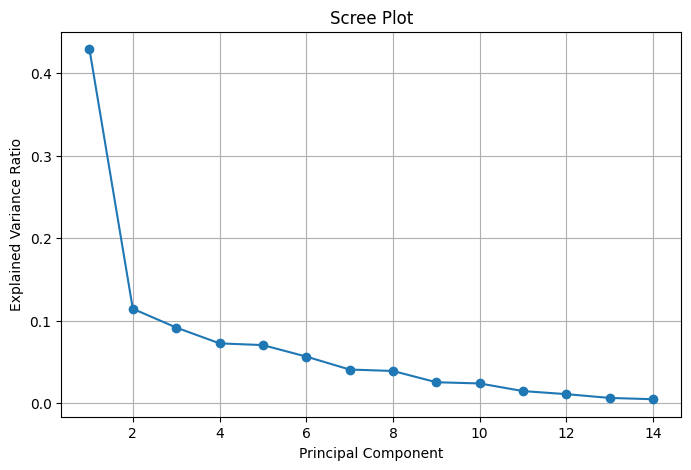

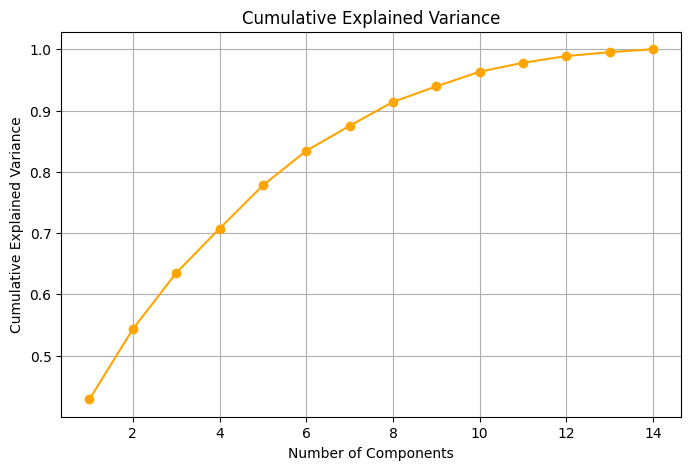

Cumulative variance explained by each additional principal component:
  PC1: 0.4289
  PC2: 0.5432
  PC3: 0.6349
  PC4: 0.7074
  PC5: 0.7777
  PC6: 0.8342
  PC7: 0.8750
  PC8: 0.9140
  PC9: 0.9394
  PC10: 0.9633
  PC11: 0.9779
  PC12: 0.9889
  PC13: 0.9952
  PC14: 1.0000


In [6]:
# --- STEP 1: Select appropriate columns for PCA ---
exclude_cols = [
    "account_id", "Year", "Year_sq",
    "account_name", "Countries", "Primary_activity", "Primary_sector"
]
numeric_cols = [
    col for col in end_of_life.columns
    if col not in exclude_cols and pd.api.types.is_numeric_dtype(end_of_life[col])
    and col != "Scope_3_emissions_amount"
]
X = end_of_life[numeric_cols].copy()

# --- STEP 2: Apply sign-log transformation ---
def sign_log_transform(x):
    return np.sign(x) * np.log1p(np.abs(x))
X_transformed = X.apply(sign_log_transform)

# --- STEP 3: Drop rows with missing values (keep track of indices) ---
X_dropped = X_transformed.dropna()
pca_indices = X_dropped.index

# --- STEP 4: Standardize the data ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_dropped)

# --- STEP 5: Fit PCA ---
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# --- STEP 6: Create a DataFrame for PCs, index matches original ---
num_pcs = X_pca.shape[1]
pc_columns = [f"PC{i+1}" for i in range(num_pcs)]
pcs_df = pd.DataFrame(X_pca, columns=pc_columns, index=pca_indices)

# --- STEP 7: Append PCs back to the original DataFrame (only for valid rows) ---
end_of_life_with_pcs = end_of_life.copy()
for col in pc_columns:
    end_of_life_with_pcs[col] = np.nan  # initialize with NaN

end_of_life_with_pcs.loc[pcs_df.index, pc_columns] = pcs_df

# --- Plots ---
explained_var_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_var_ratio) + 1), explained_var_ratio, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(
    range(1, len(explained_var_ratio) + 1),
    np.cumsum(explained_var_ratio),
    marker='o',
    color='orange'
)
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# --- Print cumulative variance explained for each PC ---
cumulative_var = np.cumsum(explained_var_ratio)
print("Cumulative variance explained by each additional principal component:")
for i, var in enumerate(cumulative_var, start=1):
    print(f"  PC{i}: {var:.4f}")

# --- END ---
# end_of_life_with_pcs now contains the principal components for valid rows.

Eight pc's explains >90% of the variance in the data, six pc's explain >80% and 4 pc's is at the bottom of the "elbow" with much less significant return for each increase in number of pc's.<br>
I'll investigate 8 pc's, 6 pc's and 4 pc's performance on HLM models.

### End of Life: PCA Feature Engineering with PC8, PC6, and PC4

- Computes sign-log transformed numeric features and fits PCA for 8, 6, and 4 components.
- Appends PC8, PC6, and PC4 features to the original dataframe for valid rows.
- Adds transformed target and renames columns for consistency.
- Splits data into train (`2018–2022`) and test (`2023`) sets by year.
- Test set is restricted to companies present in training for valid future predictions.
- Prints train and test shapes for quick verification.

_Result:_  
Prepares end-of-life data with multiple sets of principal components (PC8, PC6, PC4) and ready-to-use train/test splits for modeling.

In [7]:
# --- Prepare Data ---
exclude_cols = [
    "account_id", "Year", "Year_sq",
    "account_name", "Countries", "Primary_activity", "Primary_sector"
]
numeric_cols = [
    col for col in end_of_life.columns
    if col not in exclude_cols and pd.api.types.is_numeric_dtype(end_of_life[col])
    and col != "Scope_3_emissions_amount"
]
X = end_of_life[numeric_cols].copy()

def sign_log_transform(x):
    return np.sign(x) * np.log1p(np.abs(x))
X_transformed = X.apply(sign_log_transform)
pca_data = X_transformed.dropna().copy()
pca_data["account_id"] = end_of_life.loc[pca_data.index, "account_id"]
pca_data["Year"] = end_of_life.loc[pca_data.index, "Year"]

X_pca_input = pca_data.drop(columns=["account_id", "Year"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca_input)

# --- PCA for 8 components ---
pca8 = PCA(n_components=8)
pcs8 = pca8.fit_transform(X_scaled)
pcs8_df = pd.DataFrame(pcs8, columns=[f"PC8_{i+1}" for i in range(8)], index=pca_data.index)

# --- PCA for 6 components ---
pca6 = PCA(n_components=6)
pcs6 = pca6.fit_transform(X_scaled)
pcs6_df = pd.DataFrame(pcs6, columns=[f"PC6_{i+1}" for i in range(6)], index=pca_data.index)

# --- PCA for 4 components ---
pca4 = PCA(n_components=4)
pcs4 = pca4.fit_transform(X_scaled)
pcs4_df = pd.DataFrame(pcs4, columns=[f"PC4_{i+1}" for i in range(4)], index=pca_data.index)

# --- Merge all PC features to original DataFrame ---
end_of_life_pca = end_of_life.copy()
end_of_life_pca = end_of_life_pca.join(pcs8_df)
end_of_life_pca = end_of_life_pca.join(pcs6_df)
end_of_life_pca = end_of_life_pca.join(pcs4_df)

# --- Add transformed target and optionally other features ---
end_of_life_pca['slog_Scope_3_emissions_amount'] = sign_log_transform(end_of_life_pca['Scope_3_emissions_amount'])

# Optional: Rename columns for consistency
end_of_life_pca = end_of_life_pca.rename(columns={'incorporated_country': 'Countries',
                                                  'Primary activity': 'Primary_activity',
                                                  'Primary sector': 'Primary_sector'})

# --- Split train/test by company and year ---
train_df = end_of_life_pca[end_of_life_pca['Year'].between(2018, 2022)].copy()
test_df  = end_of_life_pca[end_of_life_pca['Year'] == 2023].copy()

# Keep only companies present in training
valid_companies = set(train_df['account_id'].unique())
test_df = test_df[test_df['account_id'].isin(valid_companies)].copy()

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (1732, 41)
Test shape: (420, 41)


In [8]:
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1732 entries, 0 to 1731
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_name                   1732 non-null   object 
 1   account_id                     1732 non-null   int64  
 2   Year                           1732 non-null   int64  
 3   Countries                      1732 non-null   object 
 4   Primary_activity               1732 non-null   object 
 5   Primary_sector                 1732 non-null   object 
 6   Market_Cap_USD                 1541 non-null   float64
 7   Revenue_USD                    1555 non-null   float64
 8   ebitda_USD                     1555 non-null   float64
 9   grossProfit_USD                1555 non-null   float64
 10  netIncome_USD                  1555 non-null   float64
 11  cashAndCashEquivalents_USD     1555 non-null   float64
 12  shortTermInvestments_USD       1555 non-null   float6

### End of Life: PC8 HLM Model with Train/Test Splits and Robust Collinearity Checks

- Uses the previously created `train_df` and `test_df` splits for modeling.
- Drops near-constant (`std < 1e-4`) and near-perfectly collinear (`corr > 0.999`) PC8 features for stability.
- Drops missing values and ensures all categorical levels in test are present in train.
- Fits a hierarchical mixed-effects model (grouped by company) using 8 principal components, country, activity, and year.
- If a singular matrix error occurs, model fitting is skipped and a message is printed to guide further feature dropping.
- Computes conditional and marginal R², and standard metrics (MAPE, MAE, RMSE, RMSLE, etc.) if fit is successful.
- Visualizes prediction distributions and feature importance.
- Returns a metrics dictionary for summary tables if the model fits.

_Result:_  
Robust HLM modeling for End of Life Scope 3 emissions using PC8 features, with enhanced checks and guidance for collinearity and singular matrix errors.

In [9]:
# --- Use train_df and test_df created from end_of_life_pca splitting ---
# PC8 model only

# Prepare model columns for PC8 (PC6 is available for later use)
feature_cols_PC8 = [f'PC8_{i}' for i in range(1, 9)]
target_col_PC8 = 'slog_Scope_3_emissions_amount'
cat_cols_PC8 = ['Countries', 'Year', 'account_id', 'Primary_activity']
all_model_vars_PC8 = feature_cols_PC8 + [target_col_PC8] + cat_cols_PC8

# Copy the splits
train_df_PC8 = train_df.copy()
test_df_PC8 = test_df.copy()

# --- PATCH: Drop constant and near-perfectly collinear columns ---
dropped_columns_report = []

# 1. Drop near-constant columns (tighter threshold)
const_cols = [col for col in feature_cols_PC8 if train_df_PC8[col].std() < 1e-4]
if const_cols:
    for col in const_cols:
        dropped_columns_report.append((col, "near-constant (std < 1e-4)"))
    print("Dropping near-constant columns:", const_cols)
    feature_cols_PC8 = [col for col in feature_cols_PC8 if col not in const_cols]

# 2. Drop near-perfectly collinear columns (corr > 0.999)
corr_matrix = train_df_PC8[feature_cols_PC8].corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
dupe_cols = [column for column in upper.columns if any(upper[column] > 0.999)]
if dupe_cols:
    for col in dupe_cols:
        dropped_columns_report.append((col, "near-perfect collinearity (corr > 0.999)"))
    print("Dropping collinear columns:", dupe_cols)
    feature_cols_PC8 = [col for col in feature_cols_PC8 if col not in dupe_cols]

# Print detailed drop report
if dropped_columns_report:
    print("\nDropped the following columns from PC8 predictors:")
    for col, reason in dropped_columns_report:
        print(f"  - {col}: {reason}")
else:
    print("\nNo PC8 columns dropped for being constant or collinear.")

# --- Drop missing values ---
train_df_PC8 = train_df_PC8.dropna(subset=all_model_vars_PC8).copy()
test_df_PC8 = test_df_PC8.dropna(subset=all_model_vars_PC8).copy()

# --- Ensure all categorical levels in test are present in train ---
for cat_col in ['Countries', 'Primary_activity']:
    train_cats = set(train_df_PC8[cat_col].unique())
    n_before = len(test_df_PC8)
    test_df_PC8 = test_df_PC8[test_df_PC8[cat_col].isin(train_cats)]
    n_after = len(test_df_PC8)
    if n_after < n_before:
        print(f"Warning: Dropped {n_before - n_after} test rows with unseen {cat_col} categories.")

if test_df_PC8.empty:
    print("WARNING: The filtered test set is empty. No predictions or metrics can be computed.")
else:
    # --- Model formula ---
    fixed_effects = (
        ' + '.join(feature_cols_PC8) +
        ' + C(Countries) + C(Primary_activity) + Year'
    )
    formula = f'{target_col_PC8} ~ {fixed_effects}'

    # --- Fit the mixed-effects model with a robust optimizer ---
    fit_success = False
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")
        md = smf.mixedlm(formula, data=train_df_PC8, groups=train_df_PC8['account_id'])
        try:
            mdf_PC8 = md.fit(reml=False, method='nm', maxiter=500, full_output=True)
            fit_success = True
        except np.linalg.LinAlgError:
            print("LinAlgError: Singular matrix encountered. Try dropping additional collinear/constant features or simplifying the model.")

    if fit_success:
        print(mdf_PC8.summary())

        # --- Calculate Conditional and Marginal R² ---
        var_fixed = np.var(mdf_PC8.fittedvalues)
        var_resid = mdf_PC8.scale
        var_random = mdf_PC8.cov_re.iloc[0, 0] if mdf_PC8.cov_re.shape[0] > 0 else 0.0
        var_random_total = var_random

        r2_marginal = var_fixed / (var_fixed + var_random_total + var_resid)
        r2_conditional = (var_fixed + var_random_total) / (var_fixed + var_random_total + var_resid)

        print(f"Marginal R² (fixed only):      {r2_marginal:.4f}")
        print(f"Conditional R² (fixed+random): {r2_conditional:.4f}")

        # --- Predict on test set ---
        test_df_PC8['predicted_log'] = mdf_PC8.predict(test_df_PC8)
        test_df_PC8['predicted'] = np.sign(test_df_PC8['predicted_log']) * (np.expm1(np.abs(test_df_PC8['predicted_log'])))

        # --- Metrics ---
        y_true_log = test_df_PC8[target_col_PC8]
        y_pred_log = test_df_PC8['predicted_log']
        y_true = np.sign(y_true_log) * (np.expm1(np.abs(y_true_log)))
        y_pred = test_df_PC8['predicted']

        mask = (
            np.isfinite(y_true_log) & np.isfinite(y_pred_log) &
            np.isfinite(y_true) & np.isfinite(y_pred)
        )
        y_true_log = y_true_log[mask]
        y_pred_log = y_pred_log[mask]
        y_true = y_true[mask]
        y_pred = y_pred[mask]

        r2_log_pct = r2_score(y_true_log, y_pred_log) * 100
        r2_pct = r2_score(y_true, y_pred) * 100
        mape_log = np.mean(np.abs((y_true_log - y_pred_log) / np.clip(y_true_log, 1e-8, None))) * 100
        mape_orig = np.mean(np.abs((y_true - y_pred) / np.clip(y_true, 1e-8, None))) * 100
        rmsle = np.sqrt(mean_squared_log_error(np.abs(y_true) + 1, np.abs(y_pred) + 1))
        rmse_orig = np.sqrt(mean_squared_error(y_true, y_pred))
        mae_orig = mean_absolute_error(y_true, y_pred)
        mae_log = mean_absolute_error(y_true_log, y_pred_log)

        metrics_text = (
            f"Conditional R²:   {r2_conditional*100:.2f}%\n"
            f"Marginal R²:      {r2_marginal*100:.2f}%\n"
            f"MAPE:             {mape_orig:.2f}%\n"
            f"MAPE(log):        {mape_log:.2f}%\n"
            f"MAE(log):         {mae_log:.2f}\n"
            f"RMSLE:            {rmsle:.2f}\n"
            f"RMSE:             {rmse_orig:.2f}\n"
            f"MAE:              {mae_orig:.2f}"
        )

        print("\nEnd of Life HLM with PC8 Fixed Effects: Test Set Performance Metrics:")
        print(metrics_text)

        # --- Feature coefficients ---
        coef_df = pd.DataFrame({
            'coef': mdf_PC8.params,
            'pvalue': mdf_PC8.pvalues
        }).drop(index="Intercept", errors='ignore').sort_values(by="pvalue")
        print("\nTop Influential Features (by p-value):")
        print(coef_df.head(10))
        print("\nAll feature coefficients sorted by absolute value:")
        print(coef_df.reindex(coef_df['coef'].abs().sort_values(ascending=False).index))

        # --- Visualization ---
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        if y_pred_log.nunique() > 1:
            sns.kdeplot(y_true_log, label='Reported', linewidth=2, fill=True, ax=axes[0], color='steelblue')
            sns.kdeplot(y_pred_log, label='HLM Model Predicted', linewidth=2, fill=True, ax=axes[0], color='darkorange')
        else:
            sns.kdeplot(y_true_log, label='Reported', linewidth=2, fill=True, ax=axes[0], color='steelblue')
            axes[0].plot([], [], ' ', label="Predicted: constant value (no KDE)")
        axes[0].set_title("End of Life HLM (PC8 Fixed Effects): Signed log(Scope 3 Emissions)")
        axes[0].set_xlabel("signed log(metric tons + 1)")
        axes[0].set_ylabel("Density")
        axes[0].legend()
        axes[0].text(1.05, 0.95, metrics_text, transform=axes[0].transAxes,
                     verticalalignment='top', fontsize=12, bbox=dict(boxstyle='round', alpha=0.15))
        if y_pred.nunique() > 1:
            sns.kdeplot(y_true, label='Reported', linewidth=2, fill=True, ax=axes[1], color='steelblue')
            sns.kdeplot(y_pred, label='HLM Model Predicted', linewidth=2, fill=True, ax=axes[1], color='darkorange')
        else:
            sns.kdeplot(y_true, label='Reported', linewidth=2, fill=True, ax=axes[1], color='steelblue')
            axes[1].plot([], [], ' ', label="Predicted: constant value (no KDE)")
        axes[1].set_title("End of Life HLM (PC8 Fixed Effects): Scope 3 Emissions (Original Scale)")
        axes[1].set_xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
        axes[1].set_ylabel("Density")
        axes[1].legend()
        axes[1].text(1.05, 0.95, metrics_text, transform=axes[1].transAxes,
                     verticalalignment='top', fontsize=12, bbox=dict(boxstyle='round', alpha=0.15))
        plt.tight_layout()
        plt.show()

        min_val = min(y_true.min(), y_pred.min())
        max_val = max(y_true.max(), y_pred.max())
        log_bins = np.logspace(np.log10(min_val + 1), np.log10(max_val + 1), 100)
        plt.figure(figsize=(8, 5))
        sns.histplot(y_true, bins=log_bins, stat="density", color="steelblue", alpha=0.5, label="Reported")
        sns.histplot(y_pred, bins=log_bins, stat="density", color="darkorange", alpha=0.5, label="HLM Model Predicted")
        plt.xscale("log")
        plt.title("End of Life HLM (PC8 Fixed Effects): Scope 3 Emissions (MT CO₂e): Histogram (log x-axis)")
        plt.xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
        plt.ylabel("Density")
        plt.legend()
        plt.tight_layout()
        plt.show()

        # --- Metrics summary dictionary ---
        PC8_model_metrics = {
            "Model": "HLM PC8",
            "Conditional_R2": r2_conditional,
            "Marginal_R2": r2_marginal,
            "RMSE": rmse_orig,
            "MAE": mae_orig,
            "MAE_log": mae_log,
            "RMSLE": rmsle,
            "MAPE": mape_orig,
            "# Obs (train)": len(train_df_PC8),
            "# Obs (test)": len(test_df_PC8),
            "# Obs (train/test)": f"{len(train_df_PC8)}/{len(test_df_PC8)}"
        }
    else:
        print("Model fitting failed due to singular matrix. Consider dropping more features or reducing the number of principal components.")

# --- NOTE: PC6 columns (PC6_1 ... PC6_6) are available in train_df/test_df for future modeling ---
# To run a model on PC6, simply use:
# feature_cols_PC6 = [f'PC6_{i}' for i in range(1, 7)]
# and follow a similar modeling pipeline as above.


No PC8 columns dropped for being constant or collinear.
LinAlgError: Singular matrix encountered. Try dropping additional collinear/constant features or simplifying the model.
Model fitting failed due to singular matrix. Consider dropping more features or reducing the number of principal components.


I'll check PC6 HLM next.

### End of Life: PC6 HLM Model with Train/Test Splits

- Uses the previously created `train_df` and `test_df` splits for PC6 modeling.
- Does **not** drop PC6 predictors for collinearity or near-constant values.
- Drops missing values and ensures all categorical levels in test are present in train.
- Fits a hierarchical mixed-effects model (grouped by company) using 6 principal components, country, activity, and year.
- If a singular matrix error occurs, model fitting is skipped and a message is printed to guide further feature dropping.
- Computes conditional and marginal R², and standard metrics (MAPE, MAE, RMSE, RMSLE, etc.) if fit is successful.
- Visualizes prediction distributions and feature importance.
- Returns a metrics dictionary for summary tables if the model fits.

_Result:_  
Direct HLM modeling for End of Life Scope 3 emissions using all PC6 features, without collinearity checks. May be unstable if predictors are not of full rank.

In [10]:
# --- PC6 HLM Model: End of Life Scope 3 Emissions (No Collinearity Dropping) ---
# Prepare model columns for PC6
feature_cols_PC6 = [f'PC6_{i}' for i in range(1, 7)]
target_col_PC6 = 'slog_Scope_3_emissions_amount'
cat_cols_PC6 = ['Countries', 'Year', 'account_id', 'Primary_activity']
all_model_vars_PC6 = feature_cols_PC6 + [target_col_PC6] + cat_cols_PC6

# Copy the splits
train_df_PC6 = train_df.copy()
test_df_PC6 = test_df.copy()

# --- Drop missing values ---
train_df_PC6 = train_df_PC6.dropna(subset=all_model_vars_PC6).copy()
test_df_PC6 = test_df_PC6.dropna(subset=all_model_vars_PC6).copy()

# --- Ensure all categorical levels in test are present in train ---
for cat_col in ['Countries', 'Primary_activity']:
    train_cats = set(train_df_PC6[cat_col].unique())
    n_before = len(test_df_PC6)
    test_df_PC6 = test_df_PC6[test_df_PC6[cat_col].isin(train_cats)]
    n_after = len(test_df_PC6)
    if n_after < n_before:
        print(f"Warning: Dropped {n_before - n_after} test rows with unseen {cat_col} categories.")

if test_df_PC6.empty:
    print("WARNING: The filtered test set is empty. No predictions or metrics can be computed.")
else:
    # --- Model formula ---
    fixed_effects = (
        ' + '.join(feature_cols_PC6) +
        ' + C(Countries) + C(Primary_activity) + Year'
    )
    formula = f'{target_col_PC6} ~ {fixed_effects}'

    # --- Fit the mixed-effects model with a robust optimizer ---
    fit_success = False
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")
        md = smf.mixedlm(formula, data=train_df_PC6, groups=train_df_PC6['account_id'])
        try:
            mdf_PC6 = md.fit(reml=False, method='nm', maxiter=500, full_output=True)
            fit_success = True
        except np.linalg.LinAlgError:
            print("LinAlgError: Singular matrix encountered. Try dropping additional features or simplifying the model.")

    if fit_success:
        print(mdf_PC6.summary())

        # --- Calculate Conditional and Marginal R² ---
        var_fixed = np.var(mdf_PC6.fittedvalues)
        var_resid = mdf_PC6.scale
        var_random = mdf_PC6.cov_re.iloc[0, 0] if mdf_PC6.cov_re.shape[0] > 0 else 0.0
        var_random_total = var_random

        r2_marginal = var_fixed / (var_fixed + var_random_total + var_resid)
        r2_conditional = (var_fixed + var_random_total) / (var_fixed + var_random_total + var_resid)

        print(f"Marginal R² (fixed only):      {r2_marginal:.4f}")
        print(f"Conditional R² (fixed+random): {r2_conditional:.4f}")

        # --- Predict on test set ---
        test_df_PC6['predicted_log'] = mdf_PC6.predict(test_df_PC6)
        test_df_PC6['predicted'] = np.sign(test_df_PC6['predicted_log']) * (np.expm1(np.abs(test_df_PC6['predicted_log'])))

        # --- Metrics ---
        y_true_log = test_df_PC6[target_col_PC6]
        y_pred_log = test_df_PC6['predicted_log']
        y_true = np.sign(y_true_log) * (np.expm1(np.abs(y_true_log)))
        y_pred = test_df_PC6['predicted']

        mask = (
            np.isfinite(y_true_log) & np.isfinite(y_pred_log) &
            np.isfinite(y_true) & np.isfinite(y_pred)
        )
        y_true_log = y_true_log[mask]
        y_pred_log = y_pred_log[mask]
        y_true = y_true[mask]
        y_pred = y_pred[mask]

        r2_log_pct = r2_score(y_true_log, y_pred_log) * 100
        r2_pct = r2_score(y_true, y_pred) * 100
        mape_log = np.mean(np.abs((y_true_log - y_pred_log) / np.clip(y_true_log, 1e-8, None))) * 100
        mape_orig = np.mean(np.abs((y_true - y_pred) / np.clip(y_true, 1e-8, None))) * 100
        rmsle = np.sqrt(mean_squared_log_error(np.abs(y_true) + 1, np.abs(y_pred) + 1))
        rmse_orig = np.sqrt(mean_squared_error(y_true, y_pred))
        mae_orig = mean_absolute_error(y_true, y_pred)
        mae_log = mean_absolute_error(y_true_log, y_pred_log)

        metrics_text = (
            f"Conditional R²:   {r2_conditional*100:.2f}%\n"
            f"Marginal R²:      {r2_marginal*100:.2f}%\n"
            f"MAPE:             {mape_orig:.2f}%\n"
            f"MAPE(log):        {mape_log:.2f}%\n"
            f"MAE(log):         {mae_log:.2f}\n"
            f"RMSLE:            {rmsle:.2f}\n"
            f"RMSE:             {rmse_orig:.2f}\n"
            f"MAE:              {mae_orig:.2f}"
        )

        print("\nEnd of Life HLM with PC6 Fixed Effects: Test Set Performance Metrics:")
        print(metrics_text)

        # --- Feature coefficients ---
        coef_df = pd.DataFrame({
            'coef': mdf_PC6.params,
            'pvalue': mdf_PC6.pvalues
        }).drop(index="Intercept", errors='ignore').sort_values(by="pvalue")
        print("\nTop Influential Features (by p-value):")
        print(coef_df.head(10))
        print("\nAll feature coefficients sorted by absolute value:")
        print(coef_df.reindex(coef_df['coef'].abs().sort_values(ascending=False).index))

        # --- Visualization ---
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        if y_pred_log.nunique() > 1:
            sns.kdeplot(y_true_log, label='Reported', linewidth=2, fill=True, ax=axes[0], color='steelblue')
            sns.kdeplot(y_pred_log, label='HLM Model Predicted', linewidth=2, fill=True, ax=axes[0], color='darkorange')
        else:
            sns.kdeplot(y_true_log, label='Reported', linewidth=2, fill=True, ax=axes[0], color='steelblue')
            axes[0].plot([], [], ' ', label="Predicted: constant value (no KDE)")
        axes[0].set_title("End of Life HLM (PC6 Fixed Effects): Signed log(Scope 3 Emissions)")
        axes[0].set_xlabel("signed log(metric tons + 1)")
        axes[0].set_ylabel("Density")
        axes[0].legend()
        axes[0].text(1.05, 0.95, metrics_text, transform=axes[0].transAxes,
                     verticalalignment='top', fontsize=12, bbox=dict(boxstyle='round', alpha=0.15))
        if y_pred.nunique() > 1:
            sns.kdeplot(y_true, label='Reported', linewidth=2, fill=True, ax=axes[1], color='steelblue')
            sns.kdeplot(y_pred, label='HLM Model Predicted', linewidth=2, fill=True, ax=axes[1], color='darkorange')
        else:
            sns.kdeplot(y_true, label='Reported', linewidth=2, fill=True, ax=axes[1], color='steelblue')
            axes[1].plot([], [], ' ', label="Predicted: constant value (no KDE)")
        axes[1].set_title("End of Life HLM (PC6 Fixed Effects): Scope 3 Emissions (Original Scale)")
        axes[1].set_xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
        axes[1].set_ylabel("Density")
        axes[1].legend()
        axes[1].text(1.05, 0.95, metrics_text, transform=axes[1].transAxes,
                     verticalalignment='top', fontsize=12, bbox=dict(boxstyle='round', alpha=0.15))
        plt.tight_layout()
        plt.show()

        min_val = min(y_true.min(), y_pred.min())
        max_val = max(y_true.max(), y_pred.max())
        log_bins = np.logspace(np.log10(min_val + 1), np.log10(max_val + 1), 100)
        plt.figure(figsize=(8, 5))
        sns.histplot(y_true, bins=log_bins, stat="density", color="steelblue", alpha=0.5, label="Reported")
        sns.histplot(y_pred, bins=log_bins, stat="density", color="darkorange", alpha=0.5, label="HLM Model Predicted")
        plt.xscale("log")
        plt.title("End of Life HLM (PC6 Fixed Effects): Scope 3 Emissions (MT CO₂e): Histogram (log x-axis)")
        plt.xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
        plt.ylabel("Density")
        plt.legend()
        plt.tight_layout()
        plt.show()

        # --- Metrics summary dictionary ---
        PC6_model_metrics = {
            "Model": "HLM PC6",
            "Conditional_R2": r2_conditional,
            "Marginal_R2": r2_marginal,
            "RMSE": rmse_orig,
            "MAE": mae_orig,
            "MAE_log": mae_log,
            "RMSLE": rmsle,
            "MAPE": mape_orig,
            "# Obs (train)": len(train_df_PC6),
            "# Obs (test)": len(test_df_PC6),
            "# Obs (train/test)": f"{len(train_df_PC6)}/{len(test_df_PC6)}"
        }
    else:
        print("Model fitting failed due to singular matrix. Consider dropping features or simplifying the model.")

LinAlgError: Singular matrix encountered. Try dropping additional features or simplifying the model.
Model fitting failed due to singular matrix. Consider dropping features or simplifying the model.


### End of Life: PC4 HLM Model with Provided Train/Test Splits

- Uses the previously created `train_df` and `test_df` splits for PC4 modeling.
- Drops missing values and ensures all categorical levels in test are present in train.
- Fits a hierarchical mixed-effects model (grouped by company) using 4 principal components, country, activity, and year.
- Computes conditional and marginal R², and standard metrics (MAPE, MAE, RMSE, RMSLE, etc.) if fit is successful.
- Visualizes prediction distributions and feature importance.
- Returns a metrics dictionary for summary tables if the model fits.

_Result:_  
HLM modeling for End of Life Scope 3 emissions using PC4 features, with consistent train/test splits and full metric/visualization reporting.

/Users/amberjensen/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2704: RuntimeWarning: invalid value encountered in sqrt
  sdf[0:self.k_fe, 1] = np.sqrt(np.diag(self.cov_params()[0:self.k_fe]))
/Users/amberjensen/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)


                                                            Mixed Linear Model Regression Results
Model:                                         MixedLM                            Dependent Variable:                            slog_Scope_3_emissions_amount
No. Observations:                              1537                               Method:                                        ML                           
No. Groups:                                    406                                Scale:                                         0.8360                       
Min. group size:                               1                                  Log-Likelihood:                                -2588.4355                   
Max. group size:                               5                                  Converged:                                     Yes                          
Mean group size:                               3.8                                                         

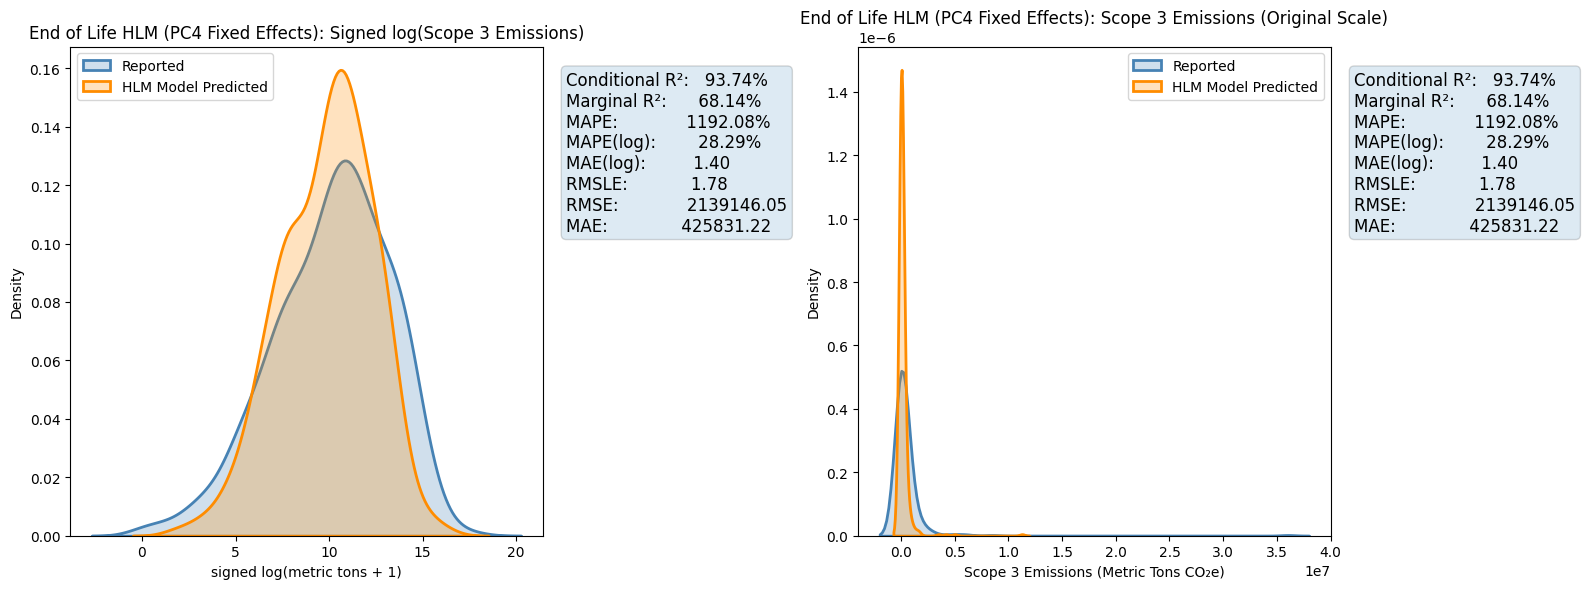

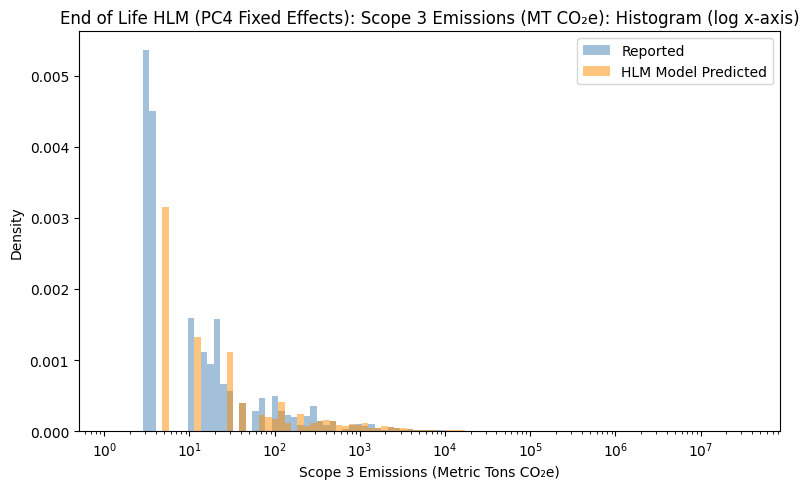

In [11]:
# --- End of Life PC4 HLM Model with Provided Train/Test Splits ---
# --- Use already created train/test splits ---
feature_cols_pc4 = [f'PC4_{i}' for i in range(1, 5)]
target_col_pc4 = 'slog_Scope_3_emissions_amount'
cat_cols_pc4 = ['Countries', 'Year', 'account_id', 'Primary_activity']
all_model_vars_pc4 = feature_cols_pc4 + [target_col_pc4] + cat_cols_pc4

# Copy splits to local variables
train_df_pc4 = train_df.copy()
test_df_pc4 = test_df.copy()

# --- Drop missing values in relevant columns ---
train_df_pc4 = train_df_pc4.dropna(subset=all_model_vars_pc4).copy()
test_df_pc4 = test_df_pc4.dropna(subset=all_model_vars_pc4).copy()

# --- Ensure all categorical levels in test are present in train ---
for cat_col in ['Countries', 'Primary_activity']:
    train_cats = set(train_df_pc4[cat_col].unique())
    n_before = len(test_df_pc4)
    test_df_pc4 = test_df_pc4[test_df_pc4[cat_col].isin(train_cats)]
    n_after = len(test_df_pc4)
    if n_after < n_before:
        print(f"Warning: Dropped {n_before - n_after} test rows with unseen {cat_col} categories.")

if test_df_pc4.empty:
    print("WARNING: The filtered test set is empty. No predictions or metrics can be computed.")
else:
    # --- Model formula ---
    fixed_effects = (
        ' + '.join(feature_cols_pc4) +
        ' + C(Countries) + C(Primary_activity) + Year'
    )
    formula = f'{target_col_pc4} ~ {fixed_effects}'

    # --- Fit the mixed-effects model ---
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")
        md = smf.mixedlm(formula, data=train_df_pc4, groups=train_df_pc4['account_id'])
        mdf_pc4 = md.fit(reml=False)
    print(mdf_pc4.summary())

    # --- Calculate Conditional and Marginal R² ---
    var_fixed = np.var(mdf_pc4.fittedvalues)
    var_resid = mdf_pc4.scale
    var_random = mdf_pc4.cov_re.iloc[0, 0] if mdf_pc4.cov_re.shape[0] > 0 else 0.0
    var_random_total = var_random

    r2_marginal = var_fixed / (var_fixed + var_random_total + var_resid)
    r2_conditional = (var_fixed + var_random_total) / (var_fixed + var_random_total + var_resid)

    print(f"Marginal R² (fixed only):      {r2_marginal:.4f}")
    print(f"Conditional R² (fixed+random): {r2_conditional:.4f}")

    # --- Predict on test set ---
    test_df_pc4['predicted_log'] = mdf_pc4.predict(test_df_pc4)
    test_df_pc4['predicted'] = np.sign(test_df_pc4['predicted_log']) * (np.expm1(np.abs(test_df_pc4['predicted_log'])))

    # --- Metrics ---
    y_true_log = test_df_pc4[target_col_pc4]
    y_pred_log = test_df_pc4['predicted_log']
    y_true = np.sign(y_true_log) * (np.expm1(np.abs(y_true_log)))
    y_pred = test_df_pc4['predicted']

    mask = (
        np.isfinite(y_true_log) & np.isfinite(y_pred_log) &
        np.isfinite(y_true) & np.isfinite(y_pred)
    )
    y_true_log = y_true_log[mask]
    y_pred_log = y_pred_log[mask]
    y_true = y_true[mask]
    y_pred = y_pred[mask]

    r2_log_pct = r2_score(y_true_log, y_pred_log) * 100
    r2_pct = r2_score(y_true, y_pred) * 100
    mape_log = np.mean(np.abs((y_true_log - y_pred_log) / np.clip(y_true_log, 1e-8, None))) * 100
    mape_orig = np.mean(np.abs((y_true - y_pred) / np.clip(y_true, 1e-8, None))) * 100
    rmsle = np.sqrt(mean_squared_log_error(np.abs(y_true) + 1, np.abs(y_pred) + 1))
    rmse_orig = np.sqrt(mean_squared_error(y_true, y_pred))
    mae_orig = mean_absolute_error(y_true, y_pred)
    mae_log = mean_absolute_error(y_true_log, y_pred_log)

    metrics_text = (
        f"Conditional R²:   {r2_conditional*100:.2f}%\n"
        f"Marginal R²:      {r2_marginal*100:.2f}%\n"
        f"MAPE:             {mape_orig:.2f}%\n"
        f"MAPE(log):        {mape_log:.2f}%\n"
        f"MAE(log):         {mae_log:.2f}\n"
        f"RMSLE:            {rmsle:.2f}\n"
        f"RMSE:             {rmse_orig:.2f}\n"
        f"MAE:              {mae_orig:.2f}"
    )

    print("\nEnd of Life HLM with PC4 Fixed Effects: Test Set Performance Metrics:")
    print(metrics_text)

    # --- Feature coefficients ---
    coef_df = pd.DataFrame({
        'coef': mdf_pc4.params,
        'pvalue': mdf_pc4.pvalues
    }).drop(index="Intercept", errors='ignore').sort_values(by="pvalue")
    print("\nTop Influential Features (by p-value):")
    print(coef_df.head(10))
    print("\nAll feature coefficients sorted by absolute value:")
    print(coef_df.reindex(coef_df['coef'].abs().sort_values(ascending=False).index))

    # --- Visualization ---
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    if y_pred_log.nunique() > 1:
        sns.kdeplot(y_true_log, label='Reported', linewidth=2, fill=True, ax=axes[0], color='steelblue')
        sns.kdeplot(y_pred_log, label='HLM Model Predicted', linewidth=2, fill=True, ax=axes[0], color='darkorange')
    else:
        sns.kdeplot(y_true_log, label='Reported', linewidth=2, fill=True, ax=axes[0], color='steelblue')
        axes[0].plot([], [], ' ', label="Predicted: constant value (no KDE)")
    axes[0].set_title("End of Life HLM (PC4 Fixed Effects): Signed log(Scope 3 Emissions)")
    axes[0].set_xlabel("signed log(metric tons + 1)")
    axes[0].set_ylabel("Density")
    axes[0].legend()
    axes[0].text(1.05, 0.95, metrics_text, transform=axes[0].transAxes,
                 verticalalignment='top', fontsize=12, bbox=dict(boxstyle='round', alpha=0.15))
    if y_pred.nunique() > 1:
        sns.kdeplot(y_true, label='Reported', linewidth=2, fill=True, ax=axes[1], color='steelblue')
        sns.kdeplot(y_pred, label='HLM Model Predicted', linewidth=2, fill=True, ax=axes[1], color='darkorange')
    else:
        sns.kdeplot(y_true, label='Reported', linewidth=2, fill=True, ax=axes[1], color='steelblue')
        axes[1].plot([], [], ' ', label="Predicted: constant value (no KDE)")
    axes[1].set_title("End of Life HLM (PC4 Fixed Effects): Scope 3 Emissions (Original Scale)")
    axes[1].set_xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
    axes[1].set_ylabel("Density")
    axes[1].legend()
    axes[1].text(1.05, 0.95, metrics_text, transform=axes[1].transAxes,
                 verticalalignment='top', fontsize=12, bbox=dict(boxstyle='round', alpha=0.15))
    plt.tight_layout()
    plt.show()

    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    log_bins = np.logspace(np.log10(min_val + 1), np.log10(max_val + 1), 100)
    plt.figure(figsize=(8, 5))
    sns.histplot(y_true, bins=log_bins, stat="density", color="steelblue", alpha=0.5, label="Reported")
    sns.histplot(y_pred, bins=log_bins, stat="density", color="darkorange", alpha=0.5, label="HLM Model Predicted")
    plt.xscale("log")
    plt.title("End of Life HLM (PC4 Fixed Effects): Scope 3 Emissions (MT CO₂e): Histogram (log x-axis)")
    plt.xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # --- Metrics dictionary for summary ---
    pc4_model_metrics = {
        "Model": "HLM PC4",
        "Conditional_R2": r2_conditional,
        "Marginal_R2": r2_marginal,
        "RMSE": rmse_orig,
        "MAE": mae_orig,
        "MAE_log": mae_log,
        "RMSLE": rmsle,
        "MAPE": mape_orig,
        "# Obs (train)": len(train_df_pc4),
        "# Obs (test)": len(test_df_pc4),
        "# Obs (train/test)": f"{len(train_df_pc4)}/{len(test_df_pc4)}"
    }

While this model converged, warnings appear, indicating problems with model fit or data stability.  These results should be interpreted with extreme caution due to the fact that model predictions and standard errors may not be valid.


Now I'll look into hierarchical clustering on PC4 features to determine if that may add value to increasing prediction accuracy.

### End of Life: Hierarchical Clustering on PC4 Features and Cluster Assignment

- Performs hierarchical clustering (Ward linkage) on standardized PC4 components.
- Finds the optimal number of clusters using silhouette scores (2–30 clusters).
- Plots silhouette scores and the dendrogram for visual inspection.
- Appends the resulting cluster labels to the original dataframe (`end_of_life_pca_clusters`).
- **Appends the cluster assignments directly to `train_df` and `test_df`** for downstream use.

_Result:_  
Both `train_df` and `test_df` now have a `Cluster` column, allowing you to use unsupervised group structure in future analyses or modeling.

Optimal number of clusters (highest silhouette score): 2


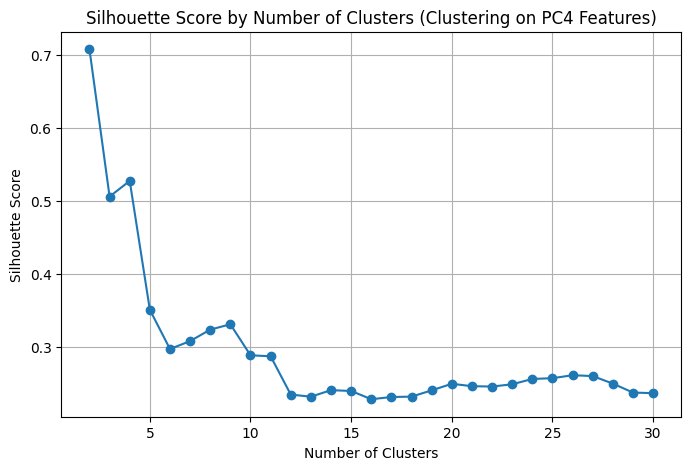

Number of observations in each cluster:
2    1895
1      40
Name: count, dtype: int64


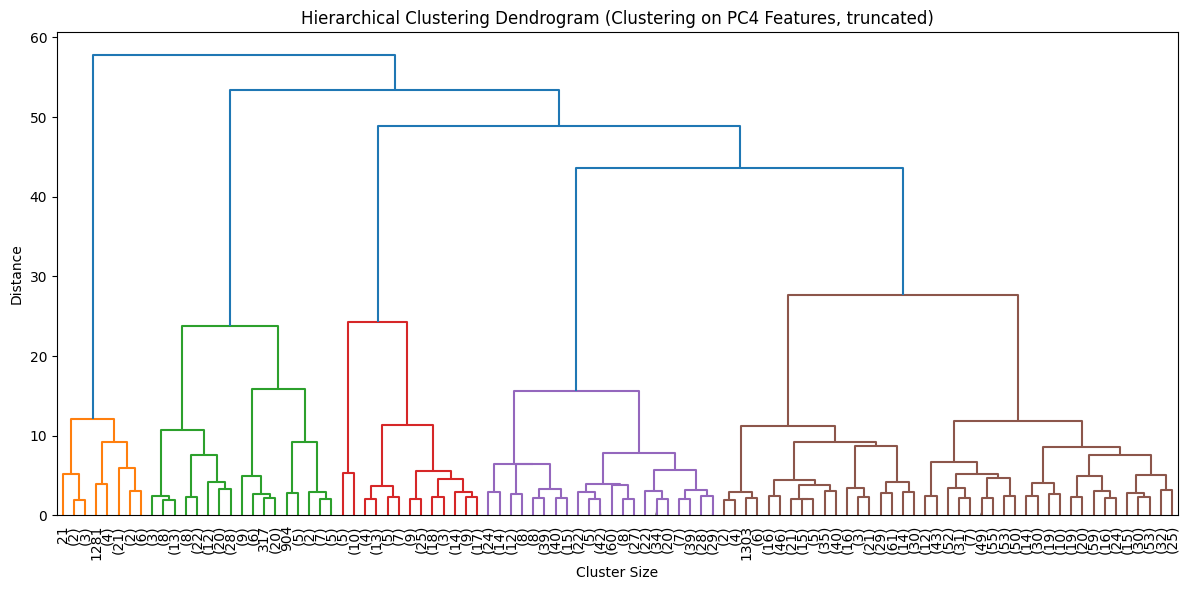

In [12]:
# --- STEP 1: Select PC4 PCA components for clustering ---
pc4_cols = [f'PC4_{i}' for i in range(1, 5)]
X_pc4 = end_of_life_pca[pc4_cols].dropna()
clust_indices = X_pc4.index

# --- STEP 2: Standardize the PC4 data ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pc4)

# --- STEP 3: Hierarchical clustering (Ward linkage) ---
Z = linkage(X_scaled, method='ward')

# --- STEP 4: Find optimal number of clusters using silhouette score ---
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

range_n_clusters = range(2, 31)  # 2 to 30 clusters
sil_scores = []

for n_clusters in range_n_clusters:
    labels = fcluster(Z, n_clusters, criterion='maxclust')
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)

optimal_n_clusters = range_n_clusters[np.argmax(sil_scores)]
print(f"Optimal number of clusters (highest silhouette score): {optimal_n_clusters}")

# --- Plot silhouette scores ---
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(range_n_clusters, sil_scores, marker='o')
plt.title('Silhouette Score by Number of Clusters (Clustering on PC4 Features)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# --- STEP 5: Assign optimal cluster labels ---
labels_optimal = fcluster(Z, optimal_n_clusters, criterion='maxclust')

# --- STEP 6: Append cluster labels back to original DataFrame (only for valid rows) ---
end_of_life_pca_clusters = end_of_life_pca.copy()
end_of_life_pca_clusters['Cluster'] = np.nan  # initialize with NaN
end_of_life_pca_clusters.loc[clust_indices, 'Cluster'] = labels_optimal

# --- Print cluster counts ---
print("Number of observations in each cluster:")
print(pd.Series(labels_optimal).value_counts())

# --- Optionally plot dendrogram (subset for readability) ---
plt.figure(figsize=(12, 6))
sample_size = min(100, len(X_scaled))  # Plot up to 100 samples for clarity
dendrogram(Z, truncate_mode='lastp', p=sample_size, leaf_rotation=90, leaf_font_size=10, show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram (Clustering on PC4 Features, truncated)')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

# --- STEP 7: Append 'Cluster' to train_df and test_df ---
if 'Cluster' not in train_df.columns:
    train_df = train_df.copy()
if 'Cluster' not in test_df.columns:
    test_df = test_df.copy()

train_df['Cluster'] = end_of_life_pca_clusters.loc[train_df.index, 'Cluster']
test_df['Cluster'] = end_of_life_pca_clusters.loc[test_df.index, 'Cluster']

In [13]:
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1732 entries, 0 to 1731
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_name                   1732 non-null   object 
 1   account_id                     1732 non-null   int64  
 2   Year                           1732 non-null   int64  
 3   Countries                      1732 non-null   object 
 4   Primary_activity               1732 non-null   object 
 5   Primary_sector                 1732 non-null   object 
 6   Market_Cap_USD                 1541 non-null   float64
 7   Revenue_USD                    1555 non-null   float64
 8   ebitda_USD                     1555 non-null   float64
 9   grossProfit_USD                1555 non-null   float64
 10  netIncome_USD                  1555 non-null   float64
 11  cashAndCashEquivalents_USD     1555 non-null   float64
 12  shortTermInvestments_USD       1555 non-null   float6

### End of Life: PC4 + Cluster HLM Model with Train/Test Splits

- Uses the previously created `train_df` and `test_df` splits for PC4+Cluster modeling.
- Drops missing values and ensures all categorical levels in test are present in train (including cluster assignment).
- Fits a hierarchical mixed-effects model (grouped by company) using 4 principal components, cluster assignment, country, activity, and year.
- Computes conditional and marginal R², and standard metrics (MAPE, MAE, RMSE, RMSLE, etc.) if fit is successful.
- Visualizes prediction distributions and feature importance.
- Returns a metrics dictionary for summary tables if the model fits.

_Result:_  
HLM modeling for End of Life Scope 3 emissions using PC4 features and unsupervised cluster assignment, with consistent train/test splits and full metric/visualization reporting.

/Users/amberjensen/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2704: RuntimeWarning: invalid value encountered in sqrt
  sdf[0:self.k_fe, 1] = np.sqrt(np.diag(self.cov_params()[0:self.k_fe]))
/Users/amberjensen/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)


                                          Mixed Linear Model Regression Results
Model:                             MixedLM                Dependent Variable:                slog_Scope_3_emissions_amount
No. Observations:                  1537                   Method:                            ML                           
No. Groups:                        406                    Scale:                             1.2463                       
Min. group size:                   1                      Log-Likelihood:                    -2653.2145                   
Max. group size:                   5                      Converged:                         Yes                          
Mean group size:                   3.8                                                                                    
--------------------------------------------------------------------------------------------------------------------------
                                                           

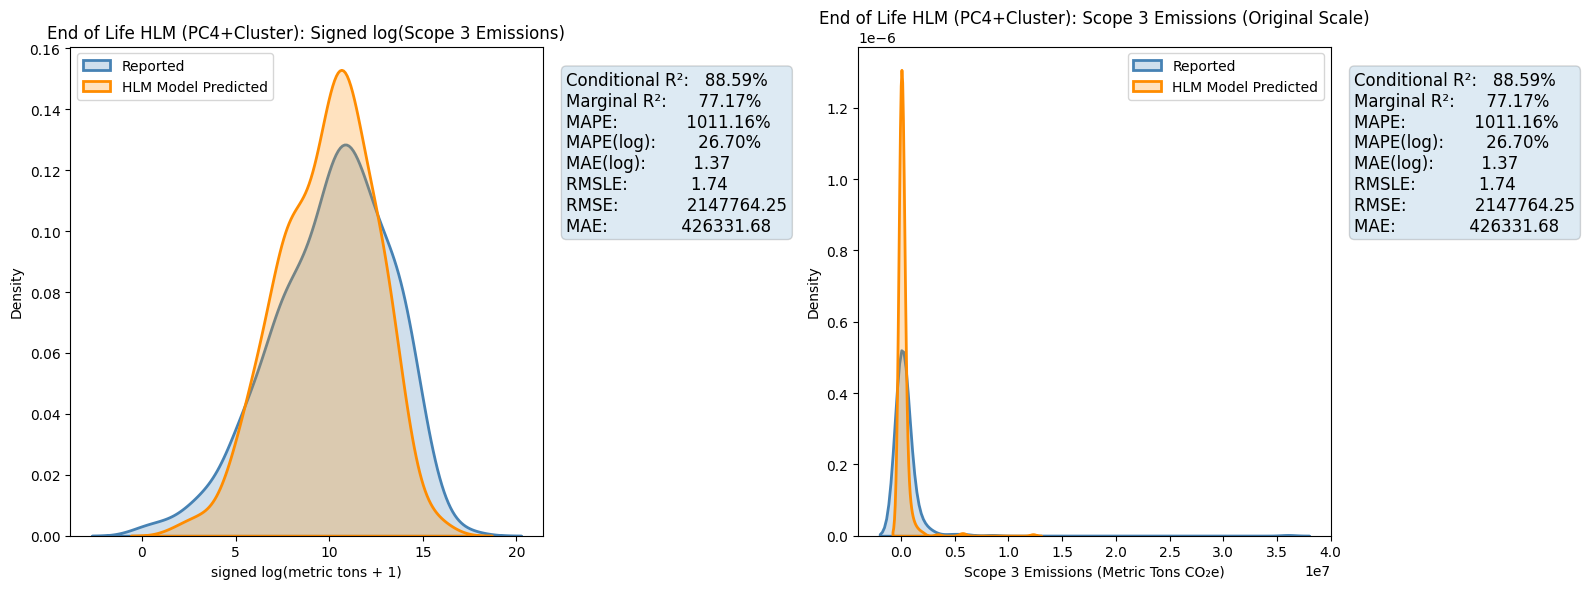

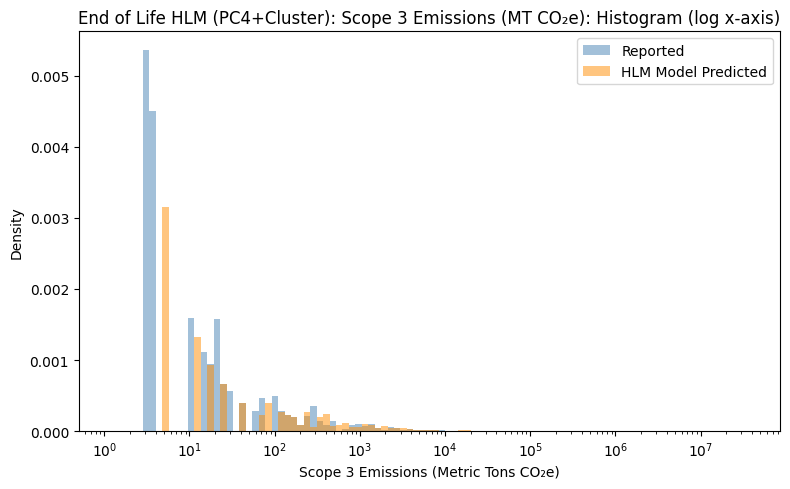

In [14]:
# --- End of Life PC4 + Cluster HLM Model (using train_df and test_df with 'Cluster' feature) ---

import numpy as np
import pandas as pd
import warnings
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error
import matplotlib.pyplot as plt
import seaborn as sns

# --- Define model columns ---
feature_cols_pc4_cluster = [f'PC4_{i}' for i in range(1, 5)] + ['Cluster']
target_col = 'slog_Scope_3_emissions_amount'
cat_cols = ['Countries', 'Year', 'account_id', 'Primary_activity']

all_model_vars = feature_cols_pc4_cluster + [target_col] + cat_cols

# --- Prepare Data ---
train_df_pc4c = train_df.dropna(subset=all_model_vars).copy()
test_df_pc4c = test_df.dropna(subset=all_model_vars).copy()

# --- Ensure all categorical levels in test are present in train ---
for cat_col in ['Countries', 'Primary_activity', 'Cluster']:
    train_cats = set(train_df_pc4c[cat_col].unique())
    n_before = len(test_df_pc4c)
    test_df_pc4c = test_df_pc4c[test_df_pc4c[cat_col].isin(train_cats)]
    n_after = len(test_df_pc4c)
    if n_after < n_before:
        print(f"Warning: Dropped {n_before - n_after} test rows with unseen {cat_col} categories.")

if test_df_pc4c.empty:
    print("WARNING: The filtered test set is empty. No predictions or metrics can be computed.")
else:
    # --- Model formula ---
    fixed_effects = (
        ' + '.join([f'C({col})' if col == 'Cluster' else col for col in feature_cols_pc4_cluster]) +
        ' + C(Countries) + C(Primary_activity) + Year'
    )
    formula = f'{target_col} ~ {fixed_effects}'

    # --- Fit the mixed-effects model ---
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")
        md = smf.mixedlm(formula, data=train_df_pc4c, groups=train_df_pc4c['account_id'])
        mdf_pc4c = md.fit(reml=False)
    print(mdf_pc4c.summary())

    # --- Calculate Conditional and Marginal R² ---
    var_fixed = np.var(mdf_pc4c.fittedvalues)
    var_resid = mdf_pc4c.scale
    var_random = mdf_pc4c.cov_re.iloc[0, 0] if mdf_pc4c.cov_re.shape[0] > 0 else 0.0
    var_random_total = var_random

    r2_marginal = var_fixed / (var_fixed + var_random_total + var_resid)
    r2_conditional = (var_fixed + var_random_total) / (var_fixed + var_random_total + var_resid)

    print(f"Marginal R² (fixed only):      {r2_marginal:.4f}")
    print(f"Conditional R² (fixed+random): {r2_conditional:.4f}")

    # --- Predict on test set ---
    test_df_pc4c['predicted_log'] = mdf_pc4c.predict(test_df_pc4c)
    test_df_pc4c['predicted'] = np.sign(test_df_pc4c['predicted_log']) * (np.expm1(np.abs(test_df_pc4c['predicted_log'])))

    # --- Metrics ---
    y_true_log = test_df_pc4c[target_col]
    y_pred_log = test_df_pc4c['predicted_log']
    y_true = np.sign(y_true_log) * (np.expm1(np.abs(y_true_log)))
    y_pred = test_df_pc4c['predicted']

    mask = (
        np.isfinite(y_true_log) & np.isfinite(y_pred_log) &
        np.isfinite(y_true) & np.isfinite(y_pred)
    )
    y_true_log = y_true_log[mask]
    y_pred_log = y_pred_log[mask]
    y_true = y_true[mask]
    y_pred = y_pred[mask]

    r2_log_pct = r2_score(y_true_log, y_pred_log) * 100
    r2_pct = r2_score(y_true, y_pred) * 100
    mape_log = np.mean(np.abs((y_true_log - y_pred_log) / np.clip(y_true_log, 1e-8, None))) * 100
    mape_orig = np.mean(np.abs((y_true - y_pred) / np.clip(y_true, 1e-8, None))) * 100
    rmsle = np.sqrt(mean_squared_log_error(np.abs(y_true) + 1, np.abs(y_pred) + 1))
    rmse_orig = np.sqrt(mean_squared_error(y_true, y_pred))
    mae_orig = mean_absolute_error(y_true, y_pred)
    mae_log = mean_absolute_error(y_true_log, y_pred_log)

    metrics_text = (
        f"Conditional R²:   {r2_conditional*100:.2f}%\n"
        f"Marginal R²:      {r2_marginal*100:.2f}%\n"
        f"MAPE:             {mape_orig:.2f}%\n"
        f"MAPE(log):        {mape_log:.2f}%\n"
        f"MAE(log):         {mae_log:.2f}\n"
        f"RMSLE:            {rmsle:.2f}\n"
        f"RMSE:             {rmse_orig:.2f}\n"
        f"MAE:              {mae_orig:.2f}"
    )

    print("\nEnd of Life HLM with PC4+Cluster Fixed Effects: Test Set Performance Metrics:")
    print(metrics_text)

    # --- Feature coefficients ---
    coef_df = pd.DataFrame({
        'coef': mdf_pc4c.params,
        'pvalue': mdf_pc4c.pvalues
    }).drop(index="Intercept", errors='ignore').sort_values(by="pvalue")
    print("\nTop Influential Features (by p-value):")
    print(coef_df.head(10))
    print("\nAll feature coefficients sorted by absolute value:")
    print(coef_df.reindex(coef_df['coef'].abs().sort_values(ascending=False).index))

    # --- Visualization ---
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    if y_pred_log.nunique() > 1:
        sns.kdeplot(y_true_log, label='Reported', linewidth=2, fill=True, ax=axes[0], color='steelblue')
        sns.kdeplot(y_pred_log, label='HLM Model Predicted', linewidth=2, fill=True, ax=axes[0], color='darkorange')
    else:
        sns.kdeplot(y_true_log, label='Reported', linewidth=2, fill=True, ax=axes[0], color='steelblue')
        axes[0].plot([], [], ' ', label="Predicted: constant value (no KDE)")
    axes[0].set_title("End of Life HLM (PC4+Cluster): Signed log(Scope 3 Emissions)")
    axes[0].set_xlabel("signed log(metric tons + 1)")
    axes[0].set_ylabel("Density")
    axes[0].legend()
    axes[0].text(1.05, 0.95, metrics_text, transform=axes[0].transAxes,
                 verticalalignment='top', fontsize=12, bbox=dict(boxstyle='round', alpha=0.15))
    if y_pred.nunique() > 1:
        sns.kdeplot(y_true, label='Reported', linewidth=2, fill=True, ax=axes[1], color='steelblue')
        sns.kdeplot(y_pred, label='HLM Model Predicted', linewidth=2, fill=True, ax=axes[1], color='darkorange')
    else:
        sns.kdeplot(y_true, label='Reported', linewidth=2, fill=True, ax=axes[1], color='steelblue')
        axes[1].plot([], [], ' ', label="Predicted: constant value (no KDE)")
    axes[1].set_title("End of Life HLM (PC4+Cluster): Scope 3 Emissions (Original Scale)")
    axes[1].set_xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
    axes[1].set_ylabel("Density")
    axes[1].legend()
    axes[1].text(1.05, 0.95, metrics_text, transform=axes[1].transAxes,
                 verticalalignment='top', fontsize=12, bbox=dict(boxstyle='round', alpha=0.15))
    plt.tight_layout()
    plt.show()
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    log_bins = np.logspace(np.log10(min_val + 1), np.log10(max_val + 1), 100)
    plt.figure(figsize=(8, 5))
    sns.histplot(y_true, bins=log_bins, stat="density", color="steelblue", alpha=0.5, label="Reported")
    sns.histplot(y_pred, bins=log_bins, stat="density", color="darkorange", alpha=0.5, label="HLM Model Predicted")
    plt.xscale("log")
    plt.title("End of Life HLM (PC4+Cluster): Scope 3 Emissions (MT CO₂e): Histogram (log x-axis)")
    plt.xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # --- Return metrics for summary table ---
    pc4_cluster_model_metrics = {
        "Model": "HLM PC4+Cluster",
        "Conditional_R2": r2_conditional,
        "Marginal_R2": r2_marginal,
        "RMSE": rmse_orig,
        "MAE": mae_orig,
        "MAE_log": mae_log,
        "RMSLE": rmsle,
        "MAPE": mape_orig,
        "# Obs (train)": len(train_df_pc4c),
        "# Obs (test)": len(test_df_pc4c),
        "# Obs (train/test)": f"{len(train_df_pc4c)}/{len(test_df_pc4c)}"
    }

Model did converge, but warnings indicate the following:
- **invalid value encountered in sqrt:** Indicates that the model's estimated variances for some coefficients are negative, likely due to collinearity or model non-identifiability. Results may be unreliable.
- **overflow encountered in expm1:** Indicates extremely large log values being exponentiated, leading to overflow. Predictions and metrics may be unreliable.

## Metrics Table

In [19]:
import pandas as pd
import numpy as np

# --- Dynamically collect available model metrics ---
model_metric_names = [
    ("PC8_model_metrics", "train_df_PC8", "test_df_PC8", "mdf_PC8", "pca8"),
    ("PC6_model_metrics", "train_df_PC6", "test_df_PC6", "mdf_PC6", "pca6"),
    ("pc4_model_metrics", "train_df_pc4", "test_df_pc4", "mdf_pc4", "pca4"),
    ("pc4_cluster_model_metrics", "train_df_pc4c", "test_df_pc4c", "mdf_pc4c", "pca4"),
]

metrics_dicts = []
trains = []
tests = []
fits = []
explained_vars = []

for metric_name, train_name, test_name, fit_name, pca_name in model_metric_names:
    if (metric_name in globals() and
        train_name in globals() and
        test_name in globals() and
        fit_name in globals() and
        pca_name in globals()):
        metrics_dicts.append(globals()[metric_name])
        trains.append(globals()[train_name])
        tests.append(globals()[test_name])
        fits.append(globals()[fit_name])
        explained_vars.append(sum(getattr(globals()[pca_name], "explained_variance_ratio_", [np.nan])))

# --- Attach observation counts, convergence status, and explained variance to each dictionary ---
for metrics, train, test, fit_result, explained_var in zip(
        metrics_dicts, trains, tests, fits, explained_vars):
    metrics["# Obs (train)"] = len(train)
    metrics["# Obs (test)"] = len(test)
    metrics["# Obs (train/test)"] = f"{len(train)}/{len(test)}"
    metrics["Converged"] = "Yes" if getattr(fit_result, "converged", False) else "No"
    metrics["PC Explained Variance"] = explained_var

# --- Add a new row for your "Optimized" model ---
optimized_row = {
    "Model": "Optimized End of Life HLM",
    "Conditional_R2": 0.9192,   # as a fraction, not percent
    "Marginal_R2": 0.7477,
    "RMSE": 2142617.06,
    "MAE": 418074.98,
    "MAE_log": 1.33,
    "RMSLE": 1.71,
    "MAPE": 973.84,
    "# Obs (train/test)": "1537/342",
    "PC Explained Variance": np.nan,
    "Converged": "Yes"
}
metrics_dicts.append(optimized_row)

metrics_df = pd.DataFrame(metrics_dicts)

# --- Order columns for summary ---
desired_order = [
    "Model", "PC Explained Variance", "Conditional_R2", "Marginal_R2",
    "RMSE", "MAE", "MAE_log", "RMSLE", "MAPE", "# Obs (train/test)", "Converged"
]

if "MAE_log" not in metrics_df.columns:
    metrics_df["MAE_log"] = np.nan

metrics_df = metrics_df[[col for col in desired_order if col in metrics_df.columns]]

# --- Format for display ---
metrics_df_display = metrics_df.copy()
if "Conditional_R2" in metrics_df_display.columns:
    metrics_df_display["Conditional_R2"] = (metrics_df_display["Conditional_R2"].astype(float) * 100).map("{:.2f}%".format)
if "Marginal_R2" in metrics_df_display.columns:
    metrics_df_display["Marginal_R2"] = (metrics_df_display["Marginal_R2"].astype(float) * 100).map("{:.2f}%".format)
for col in ["RMSE", "MAE", "MAE_log", "RMSLE", "MAPE", "PC Explained Variance"]:
    if col in metrics_df_display.columns:
        if col == "PC Explained Variance":
            metrics_df_display[col] = metrics_df_display[col].apply(lambda v: "{:.2%}".format(v) if pd.notnull(v) else "")
        else:
            metrics_df_display[col] = metrics_df_display[col].astype(float).map("{:.2f}".format)

# --- Display in notebook or print ---
try:
    display(metrics_df_display)
except Exception:
    print(metrics_df_display.to_string(index=False))

,Model,PC Explained Variance,Conditional_R2,Marginal_R2,RMSE,MAE,MAE_log,RMSLE,MAPE,# Obs (train/test),Converged
0,HLM PC4,70.74%,93.74%,68.14%,2139146.05,425831.22,1.40,1.78,1192.08,1537/349,Yes
1,HLM PC4+Cluster,70.74%,88.59%,77.17%,2147764.25,426331.68,1.37,1.74,1011.16,1537/349,Yes
2,Optimized End of Life HLM,,91.92%,74.77%,2142617.06,418074.98,1.33,1.71,973.84,1537/342,Yes
